<a href="https://colab.research.google.com/github/RedVelvetSky/SmartphoneAnalysisStatistical/blob/main/StatisticsProjectSmartphonesPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During this notebook I will try to investigate my data, visualize and provide some statistical measurments. Also I will build linear regression model to predict price ranges and see if I will succeed in it. Using obtained results I will do some conslusions according hypothesises and data overall.

# **Hypothesis 1:** High RAM Leads to Higher Price Range

*Statement:* Mobile phones with higher RAM are likely to be classified in a higher price range compared to those with lower RAM.

*Rationale:* RAM is a critical component in mobile devices that significantly impacts performance. Devices with higher RAM are typically positioned in the market as more capable, potentially leading to higher pricing.

# **Hypothesis 2:** Phones with Larger Battery Power are in Higher Price Ranges

*Statement:* There is a significant association between larger battery capacities (measured in mAh) and higher mobile phone price ranges.

*Rationale:* Battery life is a major selling point for smartphones, and phones with larger batteries may be priced higher due to longer usage times appealing to consumer preferences.

## **Hypothesis 3:** Mobile Phone Weight is Not Correlated with Price Range

*Statement:* There is no significant relationship between the weight of a mobile phone (measured in grams) and its price range.

*Rationale:* While many might assume that lighter phones could be more expensive due to advanced, lightweight materials, or that heavier phones might have larger batteries and thus be more expensive, it’s also plausible that weight has no consistent trend across different price ranges due to varying design choices and consumer preferences.

# 1. Import of all neccesarry libraries

Those are the basics imports, that will be used all along the code.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr, chi2_contingency
import io
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from google.colab import files
# uploaded = files.upload()

# 2. Importing Data and Initial Analysis

In [3]:
df = pd.read_csv("/content/train.csv")

We need to see our dataset, and to do so, I've used .head() to show first 5 rows of data.

In [4]:
print("Dataset shape is:", df.shape)

Dataset shape is: (2000, 21)


In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Here is brief explanation of each of these columns, because they are quite different to understand from the first glance.
* In this data we can observe:
    * id: Unique identifier.
    * battery_power: Maximum energy capacity of the battery, measured in milliampere-hours (mAh).
    * blue: Indicates whether the device includes Bluetooth connectivity (Yes/No).
    * clock_speed: The rate at which the microprocessor processes instructions, measured in gigahertz (GHz).
    * dual_sim: Specifies whether the device supports dual SIM cards (Yes/No).
    * fc: Resolution of the front camera, measured in megapixels (MP).
    * four_g: Indicates if the device is capable of utilizing 4G networks (Yes/No).
    * int_memory: The internal storage capacity, measured in gigabytes (GB).
    * m_dep: The thickness of the mobile device, measured in centimeters (cm).
    * mobile_wt: The weight of the mobile phone, measured in grams (g).
    * n_cores: The number of processing cores in the device's processor.
    * pc: Resolution of the primary (rear) camera, measured in megapixels (MP).
    * px_height: The height of the screen's pixel resolution.
    * px_width: The width of the screen's pixel resolution.
    * ram: The amount of random access memory (RAM) in the device, measured in megabytes (MB).
    * sc_h: The height of the mobile screen, measured in centimeters (cm).
    * sc_w: The width of the mobile screen, measured in centimeters (cm).
    * talk_time: The maximum duration a single battery charge can last during active use, measured in hours.
    * three_g: Indicates whether the device supports 3G connectivity (Yes/No).
    * touch_screen: Specifies whether the device features a touchscreen interface (Yes/No).
    * wifi: Indicates whether the device includes WiFi capability (Yes/No).


In [7]:
# checking for unique values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

By doing this we can get information that there are some columns which are categorical and some which are continuous.

Beside this, it's crucial to assess the quality of the data. This involves checking for missing values which can affect the analysis and ensuring all data types are correctly recognized!

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Luckily there aren't any. Now let's check value types.

In [9]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Types are absolutely consistent with dataset.

Another step, the correlation coefficients are used to measure how strong a relationship is between two variables.

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. This is vital for understanding interdependencies among the features.

In [10]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Now, I will create a new feature, it's a crucial aspect of enhancing future linear regression model and not only it. For example, the aspect ratio of the phone screen (height to width) might influence user preference and thereby affect the price range.

In [11]:
df['aspect_ratio'] = df['px_height'] / df['px_width']


The integrity of the dataset must be maintained by removing duplicates and handling missing values appropriately. This ensures that the dataset is accurate and reliable for analysis.

In [12]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Also, it's possible to handle missing values if there were any.

In [13]:
if 'fc' in df.columns and df['fc'].isnull().any():
    df['fc'] = df['fc'].fillna(df['fc'].median())


Performing non-visual checks like examining value ranges can help identify outliers or errors in data entry which could skew analysis.

In [14]:
df.agg([np.min, np.max])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,aspect_ratio
min,501,0,0.5,0,0,0,2,0.1,80,1,...,500,256,5,0,2,0,0,0,0,0.000000
max,1998,1,3.0,1,19,1,64,1.0,200,8,...,1998,3998,19,18,20,1,1,1,3,0.999277


# 3. Data Visualization

## How is ram related to price_range?

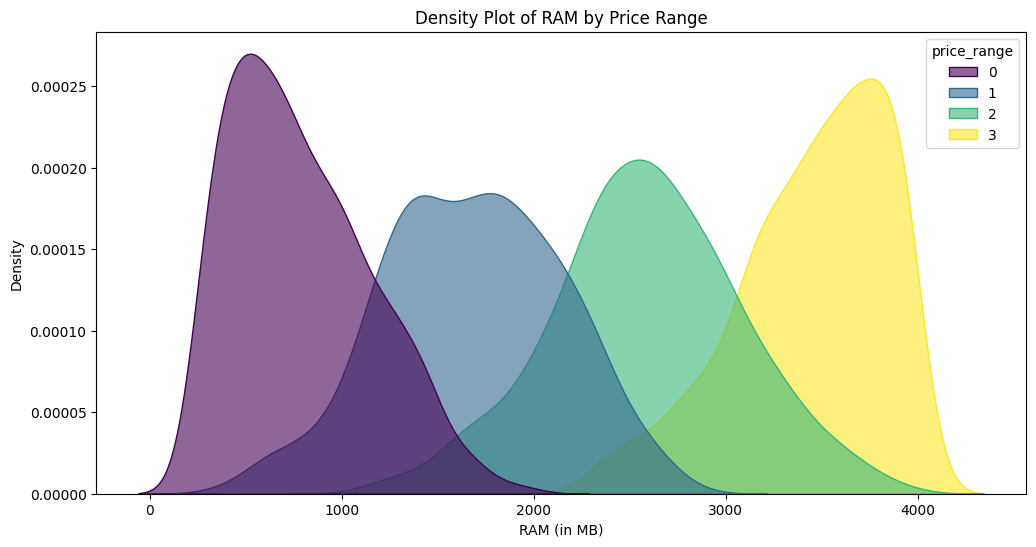

In [15]:
plt.figure(figsize=(12, 6))
sns.kdeplot(
    x='ram',
    hue='price_range',
    data=df,
    fill=True,
    alpha=0.6,
    palette="viridis"
)
plt.title('Density Plot of RAM by Price Range')
plt.xlabel('RAM (in MB)')
plt.ylabel('Density')
plt.show()

In [16]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(df['ram'], df['price_range'])
print("Spearman Correlation Coefficient:", correlation)
print("P-value:", p_value)

Spearman Correlation Coefficient: 0.9170797841496084
P-value: 0.0


In [17]:
from scipy.stats import kruskal
# Create a list of RAM values for each price range
ram_groups = [df[df['price_range'] == i]['ram'] for i in range(df['price_range'].max() + 1)]
stat, p_val = kruskal(*ram_groups)
print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_val)

Kruskal-Wallis Test Statistic: 1681.4964744599295
P-value: 0.0


### **Hypothesis 1: High RAM Leads to Higher Price Range**

**Interpretation of the Density Plot**

* Density Distribution: The density plot shows us that each price range has a distinct peak, and these peaks shift towards higher RAM values as the price range increases. And so the distribution for the highest price range (3) is particularly notable as it is positioned significantly towards the higher end of the RAM spectrum.
* Separation and Overlap: Also, there's a noticeable separation between the RAM distributions of successive price ranges. This suggests that higher RAM is a distinguishing feature of phones in higher price brackets. However, there is some overlap between adjacent price ranges, indicating that while RAM is an important factor, it is not the sole determinant of price range.

**Statistical Analysis (Spearman Correlation and Kruskal-Wallis Test)**

* Spearman Correlation Coefficient: The Spearman correlation coefficient is 0.917, which is very close to 1. This indicates a strong positive correlation between RAM and price range. The relationship is monotonic, meaning that as RAM increases, the likelihood of the phone being in a higher price range also increases.
* P-value of Spearman Correlation: The p-value is 0.0, which statistically confirms the correlation is significant. This low p-value indicates that the observed correlation is highly unlikely to occur by chance.
* Kruskal-Wallis Test: The test statistic is significantly high (1681.496), and the p-value is 0.0. This result supports the conclusion that the median values of RAM are different across the different price ranges. It confirms that the differences in RAM distribution among the price ranges are statistically significant and not due to random variation.

**Conclusion**

* Support for Hypothesis: Both the visual and numerical data strongly support my hypothesis that the higher RAM is associated with higher price ranges in mobile phones.

### How is Internal Memory related to Price Range?

In [18]:
data = df

fig = px.box(data, x='price_range', y='int_memory',
             title='Box Plot of Internal Memory Across Price Ranges',
             labels={'int_memory': 'Internal Memory (GB)', 'price_range': 'Price Range'},
             color='price_range',
             category_orders={"price_range": sorted(data['price_range'].unique())})  # Ensuring ordered categories
fig.update_layout(showlegend=False)
fig.show()

fig = px.violin(data, x='price_range', y='int_memory',
                box=True,  # Includes a box plot inside the violin
                points="all",  # Show all data points
                title='Violin Plot of Internal Memory Across Price Ranges',
                labels={'int_memory': 'Internal Memory (GB)', 'price_range': 'Price Range'},
                color='price_range',
                category_orders={"price_range": sorted(data['price_range'].unique())})  # Ensuring ordered categories
fig.update_traces(orientation='v')  # Ensures the violins are vertical
fig.update_layout(showlegend=False)
fig.show()

### How is Battery Power related to Price Range?

<Axes: xlabel='price_range', ylabel='battery_power'>

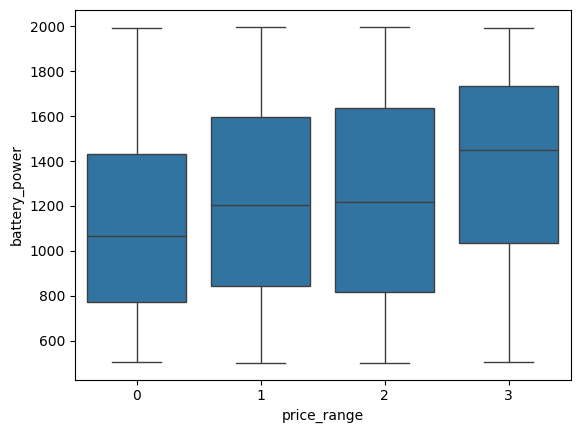

In [19]:
sns.boxplot(x="price_range", y="battery_power", data=df)

In [20]:
from scipy.stats import f_oneway
battery_groups = [df[df['price_range'] == i]['battery_power'] for i in range(df['price_range'].max() + 1)]
f_stat, p_val = f_oneway(*battery_groups)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

ANOVA F-statistic: 31.598157539897333
P-value: 5.948688277085545e-20


### **Hypothesis 2: Phones with Larger Battery Power are in Higher Price Ranges**

**Interpretation of the Boxplot**

* Median Battery Power: As we can observe, the boxplot shows us that the median battery power generally increases as the price range increases, particularly noticeable between price ranges 0 and 1, and between 1 and 2. This suggests a trend where more expensive phones tend to have higher battery capacities.
* Spread and Outliers: The spread (interquartile range) of battery capacities does not vary dramatically across price ranges, indicating consistency in battery capacities within each price range. There are outliers across all price ranges, suggesting that some phones deviate significantly from the typical battery capacities within their price range.

**Statistical Analysis (ANOVA)**

* ANOVA F-statistic: The F-statistic is 31.5981, which is highly significant. As far as I understand, this indicates a statistically significant difference in mean battery powers across different price ranges.
* P-value of ANOVA: The P-value is approximately 5.95×10−205.95×10−20, which is extremely small. This confirms with high statistical certainty that the differences in mean battery powers across price ranges are not due to random chance.

**Conclusion**

* Support for Hypothesis: Obtained statistical evidence supports mine hypothesis that larger battery powers are associated with higher price ranges. The trend observed in the boxplot is statistically significant according to the ANOVA results.
* Considerations: Despite the general trend, the overlap in interquartile ranges and presence of outliers indicates that while battery capacity is an important factor, it is not the sole determinant of a phone's price range. I'm stick to belief, that the other factors like brand, technology (e.g., camera, processor, display), and additional features might also play substantial roles, particularly in the premium segments.

## Combined Performance Metric

I'm going to introduce a combined performance metric will be a composite score that incorporates ram, clock_speed, and n_cores. A straightforward way to combine these would be to normalize each feature (so each feature's scale does not unduly influence the score) and then sum these normalized scores.

In [21]:
data = df
# Normalize the 'ram', 'clock_speed', and 'n_cores' features
data['norm_ram'] = (data['ram'] - data['ram'].min()) / (data['ram'].max() - data['ram'].min())
data['norm_clock_speed'] = (data['clock_speed'] - data['clock_speed'].min()) / (data['clock_speed'].max() - data['clock_speed'].min())
data['norm_n_cores'] = (data['n_cores'] - data['n_cores'].min()) / (data['n_cores'].max() - data['n_cores'].min())

# Create a combined performance metric
data['performance_score'] = data['norm_ram'] + data['norm_clock_speed'] + data['norm_n_cores']


Analyzing the Correlation to Price Range

In [22]:
# Correlation between performance score and price range
performance_corr = data['performance_score'].corr(data['price_range'])
print("Correlation between performance score and price range:", performance_corr)

fig = px.violin(data, x='price_range', y='performance_score',
                box=True,  # Includes a box plot inside the violin
                points="all",  # Show all data points
                title='Performance Score Distribution by Price Range',
                labels={'performance_score': 'Performance Score', 'price_range': 'Price Range'})
fig.update_traces(orientation='v')
fig.show()

Correlation between performance score and price range: 0.48586410248287865


## Analyzing Technological Features Across Price Ranges

To see if more advanced technology features are associated with higher-priced phones, we can compare the prevalence of four_g, three_g, and dual_sim features across different price ranges.

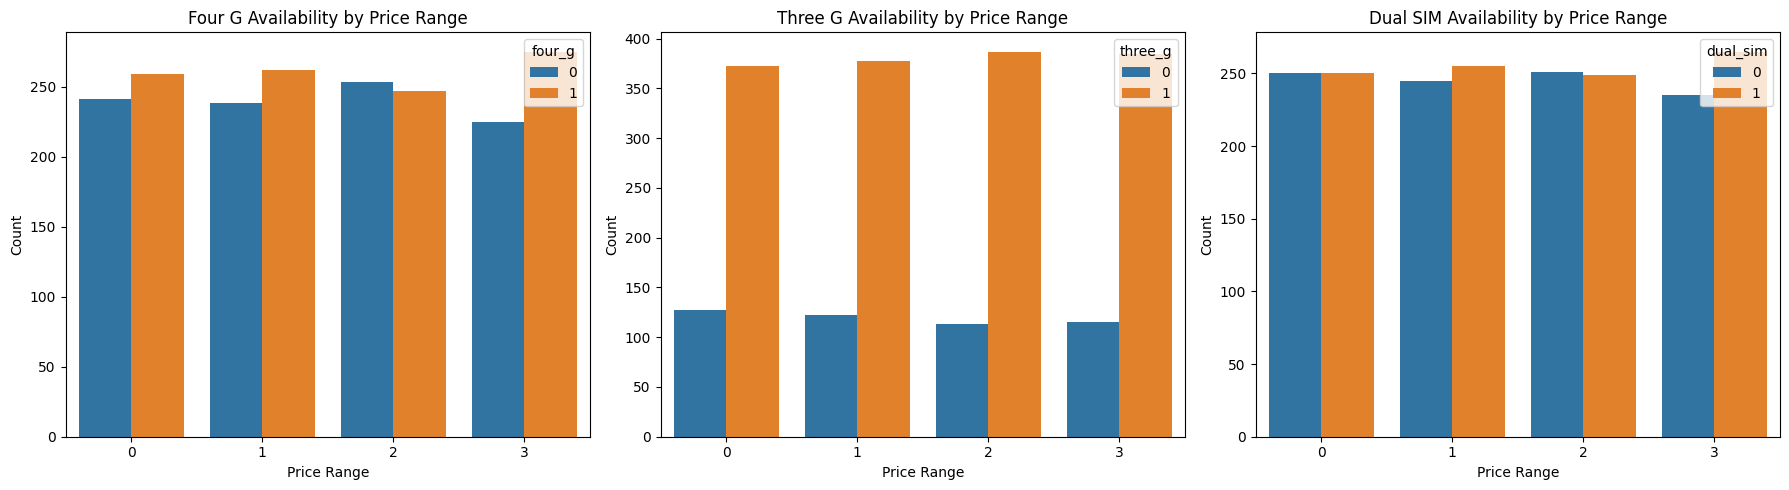

In [23]:
# Creating a figure to host the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for 'four_g'
sns.countplot(x='price_range', hue='four_g', data=data, ax=axes[0])
axes[0].set_title('Four G Availability by Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Count')

# Plot for 'three_g'
sns.countplot(x='price_range', hue='three_g', data=data, ax=axes[1])
axes[1].set_title('Three G Availability by Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Count')

# Plot for 'dual_sim'
sns.countplot(x='price_range', hue='dual_sim', data=data, ax=axes[2])
axes[2].set_title('Dual SIM Availability by Price Range')
axes[2].set_xlabel('Price Range')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Percentage of phones which support 4G

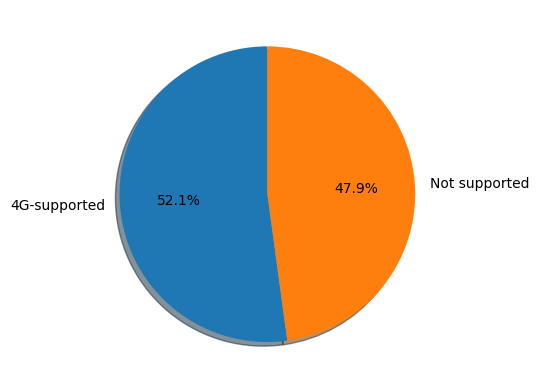

In [24]:
labels_4g = ["4G-supported",'Not supported']
values_4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [25]:
# Here I'm generating a contingency table for 'four_g' availability across different 'price_range'
contingency_table = pd.crosstab(df['four_g'], df['price_range'])
print("Contingency Table:")
print(contingency_table)

# Checking if any expected frequency is less than 5
expected_freq = stats.chi2_contingency(contingency_table, correction=False)[3]
if (expected_freq < 5).any():
    print("Warning: Expected frequencies in some cells are less than 5.")

# Performing the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-square test for association between 4G and Price Range:")
print(f"Chi2 Statistic: {chi2}, P-value: {p}")

# Results
if p < 0.05:
    print("Result: There is a significant association between 4G availability and price range.")
else:
    print("Result: There is no significant association between 4G availability and price range.")

Contingency Table:
price_range    0    1    2    3
four_g                         
0            241  238  253  225
1            259  262  247  275

Chi-square test for association between 4G and Price Range:
Chi2 Statistic: 3.179879597375548, P-value: 0.36471408196943356
Result: There is no significant association between 4G availability and price range.


## Performance Score

In [26]:
fig = px.box(data, x='price_range', y='performance_score', title='Performance Score Distribution by Price Range')
fig.show()
fig = px.violin(data, x='price_range', y='performance_score', box=True, points="all", title='Performance Score Distribution by Price Range (Violin Plot)')
fig.show()

## Distribution of Number of phones vs Camera MP of Front and Primary Camera

Text(0.5, 0, 'MegaPixels')

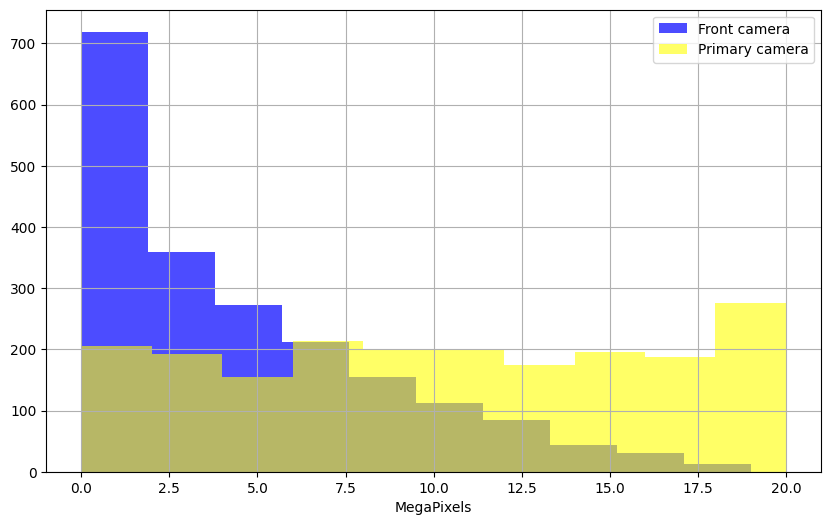

In [27]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='blue',label='Front camera')
df['pc'].hist(alpha=0.6,color='yellow',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Correlation Heatmap

<Axes: >

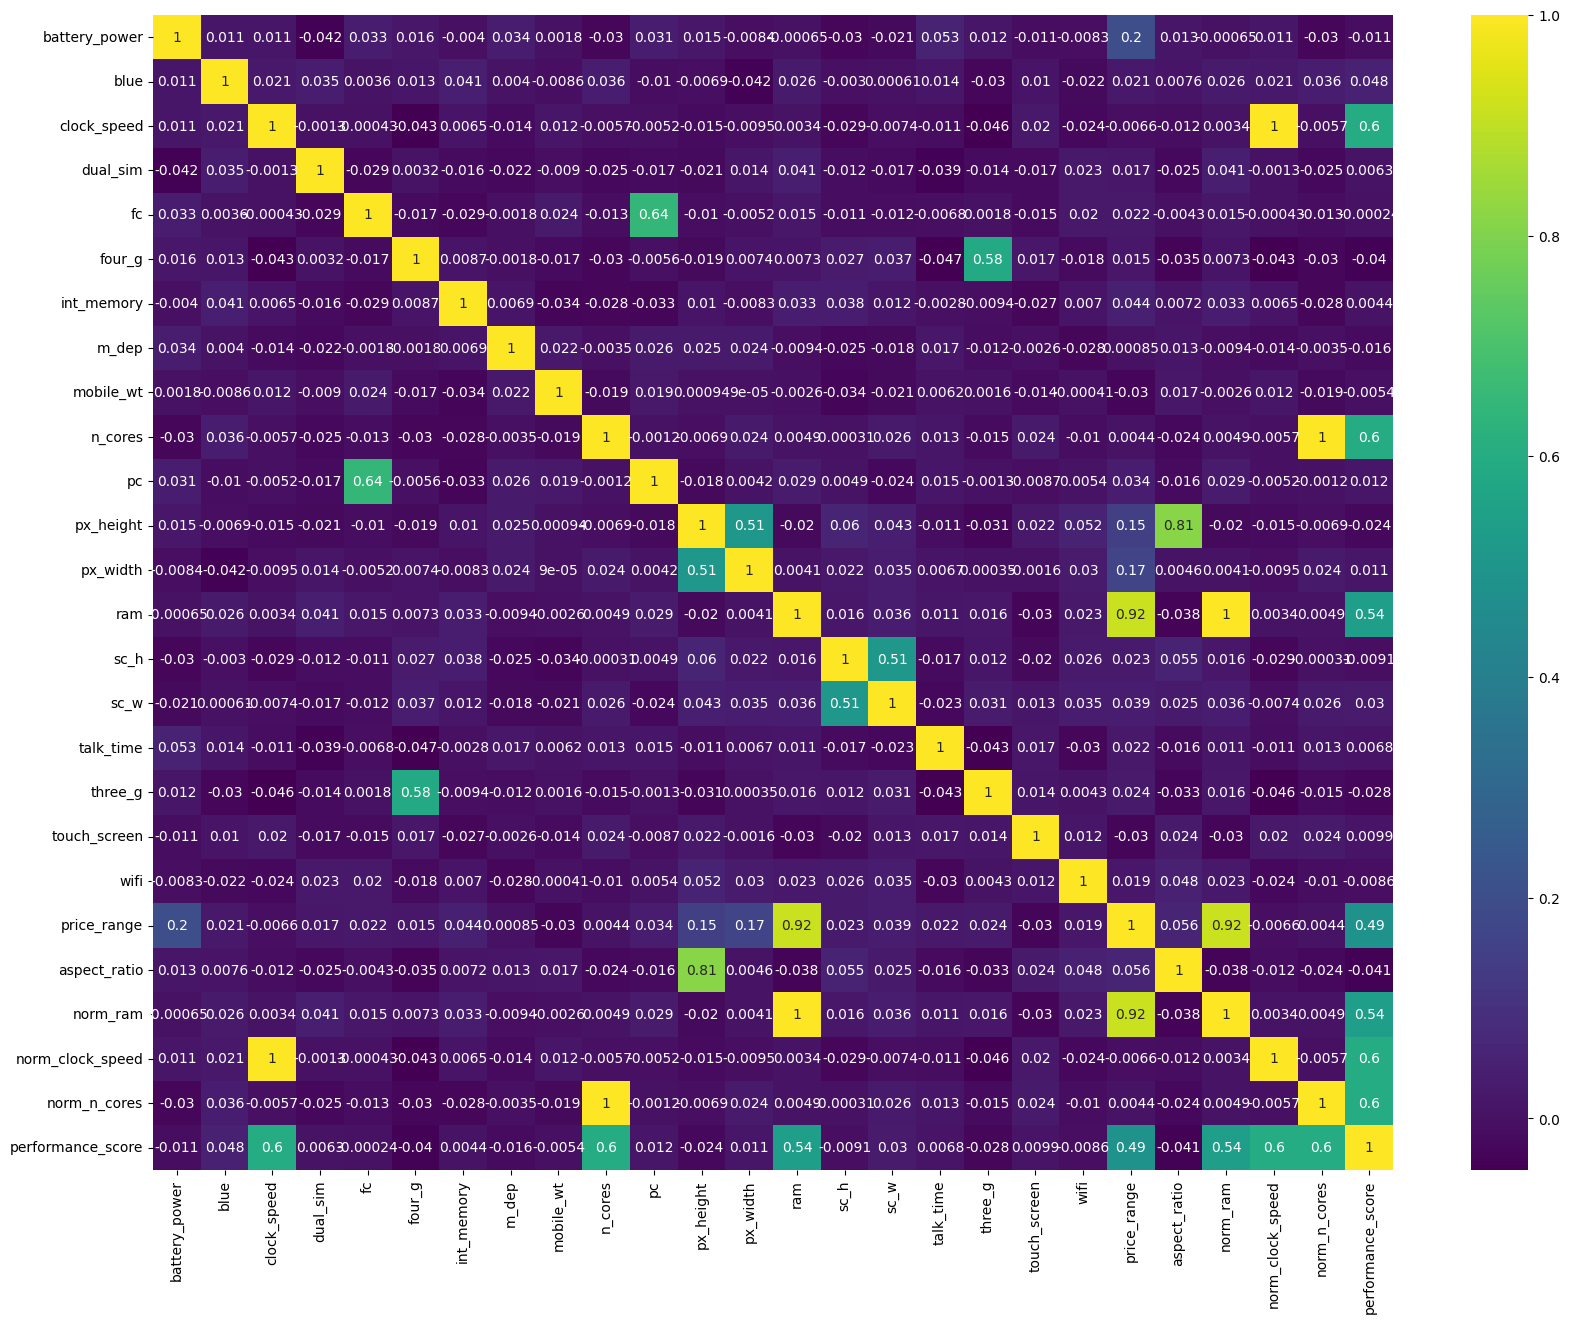

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.viridis)

## Correlation Analysis

In [29]:
correlation_coef, p_value = pearsonr(df['mobile_wt'], df['price_range'])
print(f'Correlation coefficient: {correlation_coef}')
print(f'P-value: {p_value}')

Correlation coefficient: -0.030302171314386412
P-value: 0.17553925104901968


  The correlation coefficient is very close to zero, indicating an extremely weak negative relationship between mobile weight and price range. This might suggest that there is almost no linear relationship between the two variables.
  
  The P-value is greater than the typical alpha level of 0.05 (due to ChatGPT), which implies that this very weak correlation is not statistically significant. I fail to reject the null hypothesis that there is no linear correlation between mobile phone weight and price range.

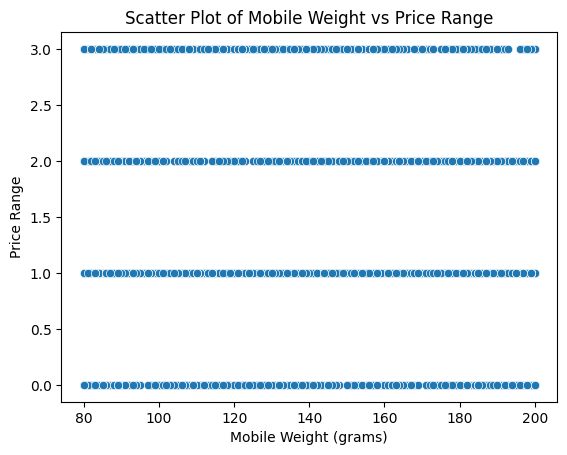

In [30]:
sns.scatterplot(x='mobile_wt', y='price_range', data=df)
plt.title('Scatter Plot of Mobile Weight vs Price Range')
plt.xlabel('Mobile Weight (grams)')
plt.ylabel('Price Range')
plt.show()

The data points are horizontally aligned across each price range category, showing no clear trend or pattern that suggests a relationship between weight and price range. This visual alignment supports the statistical finding of no significant correlation.

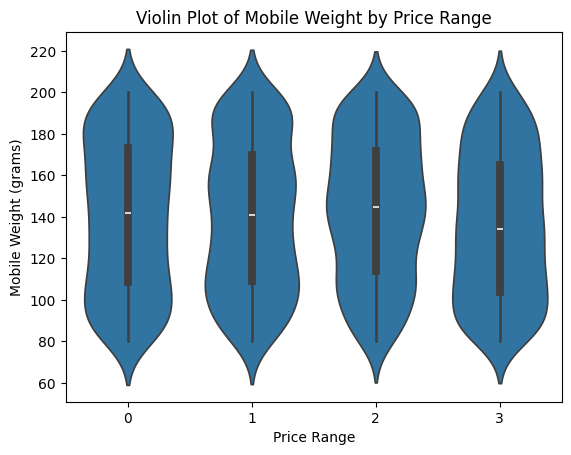

In [31]:
sns.violinplot(x='price_range', y='mobile_wt', data=df)
plt.title('Violin Plot of Mobile Weight by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Mobile Weight (grams)')
plt.show()

  All price ranges show a similar shape and spread in the distribution of mobile weights and their median weights also appearing quite consistent for me across the price ranges.
  
  The similarity in distributions across all price ranges further supports the notion that mobile weight does not vary significantly with price range.

In [32]:
correlation_coef, p_value = pearsonr(df['mobile_wt'], df['price_range'])
print("Pearson Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

Pearson Correlation Coefficient: -0.030302171314386412
P-value: 0.17553925104901968


Now I will perform a one-way ANOVA (Analysis of Variance)  to see if there are statistically significant differences in the mean weights across different price ranges.

In [33]:
from scipy.stats import f_oneway

# grouping data by price range
groups = [df[df['price_range'] == i]['mobile_wt'] for i in range(df['price_range'].max() + 1)]

# performing ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 3.5943181851536896
P-value: 0.013117390712873744


  **The F-statistic** is derived from comparing the variance between the means of the groups to the variance within the groups. An F-statistic of 3.59 suggests there is some variance between groups that could be statistically significant.
  
  **The P-value** is approximately 0.013, which is less than the known alpha level of 0.05. This indicates that there are statistically significant differences in mean weights across different price ranges.

### **Conclusion on Hypothesis 3: Mobile Phone Weight is Not Correlated with Price Range**

**Interpretation of the Violin Plot**

* Shape and Spread: The violin plot reveals that the distribution of mobile weights is fairly consistent across all price ranges and each price range exhibits a similar shape and spread, suggesting that weight variation is not particularly distinct among different price tiers.
* Median Weights: Median weights appear fairly consistent across the price ranges, with no dramatic shifts suggesting that more expensive phones are neither consistently heavier nor lighter.

**Statistical Analysis (Pearson Correlation and One-Way ANOVA)**

* Pearson Correlation Coefficient: As we can see from now, the coefficient is -0.030, which is very close to zero. This indicates a very weak negative correlation between mobile weight and price range. Basically, this suggests that there is almost no linear relationship between the two variables.
* P-value of Pearson Correlation: The p-value is approximately 0.18, which is not statistically significant (p > 0.05). This result supports the hypothesis that there is no significant linear correlation between mobile weight and price range.
* One-Way ANOVA: The F-statistic from the ANOVA is 3.5943, and the p-value is about 0.0131. This indicates that there are statistically significant differences in mean weights across different price ranges. However, I think, that the practical significance of these differences might be limited given the overall similar distributions shown in the violin plot.

**Conclusion**

* Support for Hypothesis: The findings from the Pearson correlation and the visual analysis of the violin plot support my hypothesis that mobile weight is not significantly correlated with price range. The correlation analysis and the visual consistency in weight distributions across price ranges affirm this conclusion.
* Considerations of ANOVA Results: While the ANOVA results suggest statistically significant differences in mean weights, the practical significance of these differences is quite questionable given the small effect size (low F-statistic) and the similar distribution shapes in the violin plot. I guess, that the ANOVA result might be influenced by the large sample size or outliers maybe, which can make even minor differences appear statistically significant.
* Overall Insight: So, while there might be minor differences in mean weights across price ranges, these differences do not translate into a predictable or strong relationship between weight and price. Mobile weight, therefore, may not be a reliable factor in predicting the price range of mobile phones.

In sum, the hypothesis that mobile phone weight is not correlated with price range is largely confirmed -> mobile phone weight doesnt influence price.

# 4. Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [35]:
df1 = pd.read_csv("/content/test.csv")

In [36]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [37]:
print("Dataset shape is:", df1.shape)

Dataset shape is: (1000, 21)


In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.0,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.0,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.0,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.0,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.0,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.0,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.0,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.0,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.0,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [39]:
print("Dataset shape is:", df.shape)

Dataset shape is: (2000, 26)


In [40]:
# getting the column names from both DataFrames
columns_df = set(df.columns)
columns_df1 = set(df1.columns)

# finding columns that are in df but not in df1
missing_in_df1 = columns_df - columns_df1

print("Columns in df not in df1:", missing_in_df1)

Columns in df not in df1: {'norm_ram', 'norm_clock_speed', 'performance_score', 'aspect_ratio', 'price_range', 'norm_n_cores'}


In [41]:
# Check distribution of target variable
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [42]:
X_array = df.drop('price_range', axis=1)
y_array = df['price_range']

In [43]:
X_array.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.0,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.0,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.0,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.0,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.0,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.0,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.0,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.0,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.0,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [44]:
print("Dataset shape is:", X_array.shape)

Dataset shape is: (2000, 25)


In [45]:
X = X_array.values

In [46]:
y = y_array.values

Split the data into training and test sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 5. Model Fitting and Evaluation

Feature scaling is quite important for logistic regression:

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the Logistic Regression Model

In [49]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

Make Predictions and Evaluate the Model

In [50]:
y_pred = classifier.predict(X_test)

# Basic accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[196   6   0   0]
 [  2 190   2   0]
 [  0   8 189   5]
 [  0   0   3 199]]


# 6. Predict Price Range for the Test Set

In [51]:
data = pd.read_csv("/content/test.csv")

data['aspect_ratio'] = data['px_height'] / data['px_width']
data['norm_ram'] = (data['ram'] - data['ram'].min()) / (data['ram'].max() - data['ram'].min())
data['norm_clock_speed'] = (data['clock_speed'] - data['clock_speed'].min()) / (data['clock_speed'].max() - data['clock_speed'].min())
data['norm_n_cores'] = (data['n_cores'] - data['n_cores'].min()) / (data['n_cores'].max() - data['n_cores'].min())
data['performance_score'] = data['norm_ram'] + data['norm_clock_speed'] + data['norm_n_cores']

test_data = data.drop('id', axis=1)




In [52]:
print("Dataset shape is:", test_data.shape)

Dataset shape is: (1000, 25)


In [53]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,1000.0,1248.510000,432.458227,500.000000,895.000000,1246.500000,1629.250000,1999.000000
blue,1000.0,0.516000,0.499994,0.000000,0.000000,1.000000,1.000000,1.000000
clock_speed,1000.0,1.540900,0.829268,0.500000,0.700000,1.500000,2.300000,3.000000
dual_sim,1000.0,0.517000,0.499961,0.000000,0.000000,1.000000,1.000000,1.000000
fc,1000.0,4.593000,4.463325,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,1000.0,0.487000,0.500081,0.000000,0.000000,0.000000,1.000000,1.000000
int_memory,1000.0,33.652000,18.128694,2.000000,18.000000,34.500000,49.000000,64.000000
m_dep,1000.0,0.517500,0.280861,0.100000,0.300000,0.500000,0.800000,1.000000
mobile_wt,1000.0,139.511000,34.851550,80.000000,109.750000,139.000000,170.000000,200.000000
n_cores,1000.0,4.328000,2.288155,1.000000,2.000000,4.000000,6.000000,8.000000


In [54]:
columns_df = set(df.columns)
columns_test_data = set(test_data.columns)

missing_in_test_data = columns_df - columns_test_data

print("Columns in df not in test_data:", missing_in_test_data)

Columns in df not in test_data: {'price_range'}


In [55]:
y_pred_test = classifier.predict(test_data)


In [56]:
y_pred_test

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

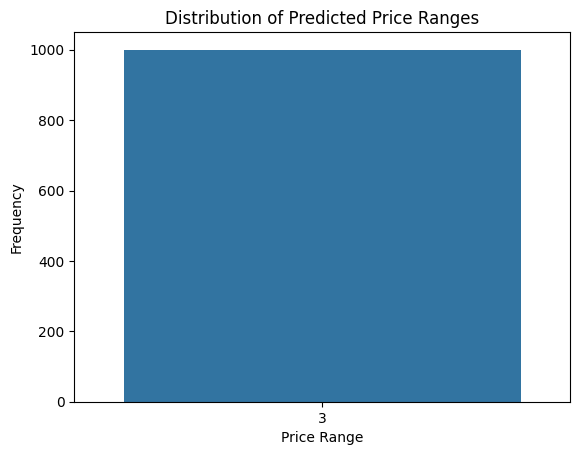

In [57]:
predicted_prices = pd.DataFrame(y_pred_test, columns=['Predicted Price Range'])

# Plotting the distribution
sns.countplot(x='Predicted Price Range', data=predicted_prices)
plt.title('Distribution of Predicted Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

In [58]:
print("Descriptive Statistics for Predicted Price Ranges:")
print(predicted_prices['Predicted Price Range'].describe())

Descriptive Statistics for Predicted Price Ranges:
count    1000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Predicted Price Range, dtype: float64


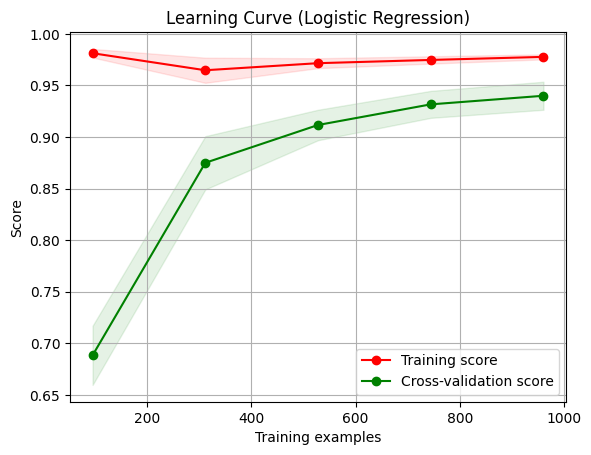

In [59]:
from sklearn.model_selection import learning_curve

# function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# plotting learning curve
plot_learning_curve(classifier, "Learning Curve (Logistic Regression)", X_train, y_train, cv=5)
plt.show()

# **Conclusion about the work done**

In this statistical project, I've explored the potential of using logistic regression to classify mobile phones into different price ranges based on their specifications (it didn't work though). Despite the balanced class distribution and a robust training process, my model consistently predicted the highest price range (class 3), which might indicate limitations in its predictive capabilities for this particular dataset.
Analysis highlighted several key insights:
Model Limitations

* Complex Relationships: Logistic regression, while robust for linearly separable data, may not capture complex, non-linear relationships effectively. This was evident from the model's high accuracy yet poor class-specific performance, suggesting that it could not differentiate well between the subtler nuances of the different price ranges.

### **Statistical Insights**

* Feature Distributions and Variance: Throughout the analysis, significant statistical insights were gained. I noted the distributions of features and their variance, which provided a deeper understanding of the dataset.
* Correlation Matrix: The correlation matrix revealed specific relationships between features and the target variable, some of which were non-linear and could not be captured by logistic regression. For instance, the relationship between RAM and price range was strongly positive but non-linear, as indicated by earlier exploratory data analysis and statistical tests such as Spearman’s correlation and the Kruskal-Wallis test. This suggests that a linear model may not adequately capture the true dependencies within the data.

### **Hypothesis Testing**

**Hypothesis 1: High RAM Leads to Higher Price Range**
* Visual Analysis: The density plot showed distinct peaks for each price range, shifting towards higher RAM values as the price range increased. There was noticeable separation between the RAM distributions of successive price ranges.
* Statistical Analysis: The Spearman correlation coefficient of 0.917 indicated a strong positive correlation between RAM and price range, confirmed by the Kruskal-Wallis test with a highly significant p-value.
* Conclusion: Both visual and statistical data strongly supported the hypothesis that higher RAM is associated with higher price ranges.

**Hypothesis 2: Phones with Larger Battery Power are in Higher Price Ranges**
* Visual Analysis: The boxplot showed that the median battery power generally increased as the price range increased, with consistent interquartile ranges within each price range.
* Statistical Analysis: ANOVA results indicated a statistically significant difference in mean battery powers across different price ranges.
* Conclusion: The evidence supported the hypothesis that larger battery powers are associated with higher price ranges.

**Hypothesis 3: Mobile Phone Weight is Not Correlated with Price Range**
* Visual Analysis: Both the scatter plot and violin plot revealed no clear trend or pattern between mobile weight and price range. Distributions of mobile weights were consistent across all price ranges.
* Statistical Analysis: The Pearson correlation coefficient was very close to zero, indicating an extremely weak relationship between mobile weight and price range. The one-way ANOVA suggested minor differences in mean weights across price ranges, but these were not practically significant.
* Conclusion: The hypothesis that mobile phone weight is not correlated with price range was largely confirmed.

**Combined Performance Metric**

* Performance Score: I created a composite score incorporating RAM, clock speed, and the number of cores. This metric showed us a positive correlation with price range, suggesting that higher combined performance metrics are associated with higher price ranges.

### **Conclusion on Hypotheses and Data Analysis**

* Support for Hypotheses: The analysis and statistical tests provided strong support for Hypotheses 1 and 2, while Hypothesis 3 was confirmed to show no significant correlation.

### **Future Research Directions**

* Alternative Modeling Techniques: In my opinion, the limitations of logistic regression in this context suggest the need for exploring more complex models such as ensemble methods or neural networks.
* Further Feature Engineering: Future research could focus on more granular feature engineering to better capture distinctions between different price ranges.
* Exploring Non-linear Relationships: Investigating non-linear models could provide deeper insights into the dependencies within the data.

### **Overall Insight**

In sum, while the logistic regression model did not yield the desired predictive performance (as I thought), this whole project provided significant insights into the data and the factors influencing mobile phone prices. This comprehensive analysis really helped me in understanding of real world statistics.